In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [6]:
for i in scaled_train_samples:
    print(i)

[0.13793103]
[0.82758621]
[0.59770115]
[0.81609195]
[0.62068966]
[0.02298851]
[0.6091954]
[0.43678161]
[0.29885057]
[0.01149425]
[0.20689655]
[0.03448276]
[0.56321839]
[0.66666667]
[0.64367816]
[0.93103448]
[0.83908046]
[0.31034483]
[0.79310345]
[0.83908046]
[0.34482759]
[0.87356322]
[0.12643678]
[0.29885057]
[0.95402299]
[0.22988506]
[0.32183908]
[0.64367816]
[0.49425287]
[0.93103448]
[0.50574713]
[0.26436782]
[0.2183908]
[0.5862069]
[0.56321839]
[0.55172414]
[0.44827586]
[0.49425287]
[0.17241379]
[0.59770115]
[0.6091954]
[0.50574713]
[0.18390805]
[0.04597701]
[0.09195402]
[0.88505747]
[0.33333333]
[0.10344828]
[0.83908046]
[0.98850575]
[0.79310345]
[1.]
[0.35632184]
[0.01149425]
[0.1954023]
[0.50574713]
[0.74712644]
[0.10344828]
[0.5862069]
[0.79310345]
[0.90804598]
[0.29885057]
[0.77011494]
[0.79310345]
[0.27586207]
[0.68965517]
[0.85057471]
[0.59770115]
[0.03448276]
[0.27586207]
[0.63218391]
[0.01149425]
[0.83908046]
[0.85057471]
[0.87356322]
[0.90804598]
[0.11494253]
[0.90804598]


[0.1954023]
[0.59770115]
[0.66666667]
[0.90804598]
[0.6091954]
[0.34482759]
[0.32183908]
[0.11494253]
[0.44827586]
[0.87356322]
[0.25287356]
[0.45977011]
[0.94252874]
[0.06896552]
[0.09195402]
[0.62068966]
[0.82758621]
[0.74712644]
[0.94252874]
[0.71264368]
[0.11494253]
[0.95402299]
[0.57471264]
[0.75862069]
[0.73563218]
[0.67816092]
[0.27586207]
[0.4137931]
[0.51724138]
[0.70114943]
[0.4137931]
[0.44827586]
[0.29885057]
[0.5862069]
[0.32183908]
[0.90804598]
[0.12643678]
[0.25287356]
[0.43678161]
[0.85057471]
[0.65517241]
[0.90804598]
[0.54022989]
[0.44827586]
[0.74712644]
[0.71264368]
[0.40229885]
[0.37931034]
[0.51724138]
[0.79310345]
[0.79310345]
[0.24137931]
[0.50574713]
[0.68965517]
[0.86206897]
[0.31034483]
[0.83908046]
[1.]
[0.96551724]
[0.81609195]
[0.27586207]
[0.6091954]
[0.83908046]
[0.32183908]
[0.65517241]
[0.95402299]
[0.36781609]
[0.20689655]
[0.57471264]
[0.51724138]
[0.44827586]
[0.37931034]
[0.03448276]
[0.62068966]
[0.98850575]
[0.75862069]
[0.98850575]
[0.37931034]


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Train on 2100 samples
Epoch 1/30
2100/2100 - 3s - loss: 0.6634 - accuracy: 0.5462
Epoch 2/30
2100/2100 - 0s - loss: 0.6295 - accuracy: 0.6362
Epoch 3/30
2100/2100 - 0s - loss: 0.5913 - accuracy: 0.7310
Epoch 4/30
2100/2100 - 0s - loss: 0.5563 - accuracy: 0.7743
Epoch 5/30
2100/2100 - 0s - loss: 0.5222 - accuracy: 0.8005
Epoch 6/30
2100/2100 - 0s - loss: 0.4882 - accuracy: 0.8300
Epoch 7/30
2100/2100 - 0s - loss: 0.4539 - accuracy: 0.8643
Epoch 8/30
2100/2100 - 0s - loss: 0.4221 - accuracy: 0.8729
Epoch 9/30
2100/2100 - 0s - loss: 0.3938 - accuracy: 0.8905
Epoch 10/30
2100/2100 - 0s - loss: 0.3698 - accuracy: 0.9024
Epoch 11/30
2100/2100 - 0s - loss: 0.3494 - accuracy: 0.9105
Epoch 12/30
2100/2100 - 0s - loss: 0.3331 - accuracy: 0.9148
Epoch 13/30
2100/2100 - 0s - loss: 0.3195 - accuracy: 0.9181
Epoch 14/30
2100/2100 - 0s - loss: 0.3088 - accuracy: 0.9243
Epoch 15/30
2100/2100 - 0s - loss: 0.3001 - accuracy: 0.9219
Epoch 16/30
2100/2100 - 0s - loss: 0.2927 - accuracy: 0.9271
Epoch 17/30

In [14]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 0s - loss: 0.2574 - accuracy: 0.9349 - val_loss: 0.2547 - val_accuracy: 0.9286
Epoch 2/30
1890/1890 - 0s - loss: 0.2564 - accuracy: 0.9392 - val_loss: 0.2539 - val_accuracy: 0.9286
Epoch 3/30
1890/1890 - 0s - loss: 0.2557 - accuracy: 0.9360 - val_loss: 0.2538 - val_accuracy: 0.9286
Epoch 4/30
1890/1890 - 0s - loss: 0.2550 - accuracy: 0.9354 - val_loss: 0.2540 - val_accuracy: 0.9429
Epoch 5/30
1890/1890 - 0s - loss: 0.2541 - accuracy: 0.9407 - val_loss: 0.2531 - val_accuracy: 0.9286
Epoch 6/30
1890/1890 - 0s - loss: 0.2534 - accuracy: 0.9360 - val_loss: 0.2527 - val_accuracy: 0.9286
Epoch 7/30
1890/1890 - 0s - loss: 0.2528 - accuracy: 0.9392 - val_loss: 0.2524 - val_accuracy: 0.9286
Epoch 8/30
1890/1890 - 0s - loss: 0.2519 - accuracy: 0.9370 - val_loss: 0.2524 - val_accuracy: 0.9286
Epoch 9/30
1890/1890 - 0s - loss: 0.2514 - accuracy: 0.9360 - val_loss: 0.2523 - val_accuracy: 0.9429
Epoch 10/30
1890/1890 - 0s - loss: 

In [23]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [25]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [26]:
for i in predictions:
    print(i)

[0.9728923  0.02710769]
[0.314514   0.68548596]
[0.11969247 0.88030756]
[0.9730483  0.02695168]
[0.01713721 0.9828628 ]
[0.9336541  0.06634583]
[0.04844666 0.95155334]
[0.01713721 0.9828628 ]
[0.01437459 0.98562545]
[0.4583392 0.5416607]
[0.12950182 0.8704982 ]
[0.09421332 0.90578663]
[0.03748791 0.96251214]
[0.9586011  0.04139895]
[0.06783468 0.9321653 ]
[0.925343   0.07465706]
[0.02652658 0.97347337]
[0.05737639 0.94262356]
[0.925343   0.07465706]
[0.36006626 0.63993376]
[0.314514   0.68548596]
[0.09421332 0.90578663]
[0.9697081  0.03029188]
[0.06240131 0.93759865]
[0.40828663 0.59171337]
[0.05273331 0.94726664]
[0.97321534 0.02678471]
[0.11969247 0.88030756]
[0.05737639 0.94262356]
[0.02228464 0.9777154 ]
[0.04844666 0.95155334]
[0.97065675 0.02934328]
[0.06240131 0.93759865]
[0.02228464 0.9777154 ]
[0.96092695 0.03907306]
[0.97263914 0.02736082]
[0.01437459 0.98562545]
[0.09421332 0.90578663]
[0.9730483  0.02695168]
[0.10211495 0.8978851 ]
[0.03439555 0.9656045 ]
[0.97321534 0.0267

In [27]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
1
1
1
1
0
0
1
0
0
0
1
1
1
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0
1
0
0
0
1
1


In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [30]:
cm

array([[194,  16],
       [ 10, 200]], dtype=int64)

In [31]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


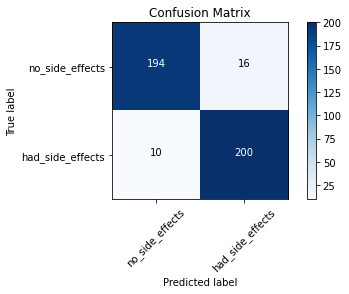

In [33]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [36]:
model.save('Desktop\model/medical_trial_model.h5')

In [37]:
from tensorflow.keras.models import load_model
new_model = load_model('Desktop\model/medical_trial_model.h5')

In [39]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
